## 📌 Step 1: Import Required 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 📌 Step 2: Load the Dataset

In [35]:
df = pd.read_csv(r"C:\Users\zabiz\Downloads\ML_Models\Classification\Decision Tree Classification\credit_scoring_dataset_with_date.csv")

## 📌 Step 3: View First 5 Rows of Dataset

In [3]:
df.head()

,ID,Age,Income,LoanAmount,CreditScore,EmploymentYears,Dependents,Married,OwnHouse,DefaultedBefore,Date,Approved
0,1,56,83026,43138,697,36,4,0,0,1,2015-01-01,0
1,2,69,98504,4365,391,8,2,1,1,0,2015-01-02,0
2,3,46,128388,46416,563,5,1,0,0,0,2015-01-03,0
3,4,32,33280,41884,590,27,4,0,0,0,2015-01-04,0
4,5,60,149892,32427,622,6,0,0,1,1,2015-01-05,0


## 📌 Step 4: Remove Unnecessary Columns (ID)

In [4]:
df = df.drop(columns=["Date"],axis=1)
df = df.drop(columns=["ID"],axis=1)

## 📌 Step 5: View Updated Dataset After Removing ID

In [5]:
df.head()

,Age,Income,LoanAmount,CreditScore,EmploymentYears,Dependents,Married,OwnHouse,DefaultedBefore,Approved
0,56,83026,43138,697,36,4,0,0,1,0
1,69,98504,4365,391,8,2,1,1,0,0
2,46,128388,46416,563,5,1,0,0,0,0
3,32,33280,41884,590,27,4,0,0,0,0
4,60,149892,32427,622,6,0,0,1,1,0


## 📌 Step 6: Check Dataset Shape

In [6]:
df.shape

(50000, 10)

## 📌 Step 7: Check Unique Classes in Target Column (`Approved`)

In [37]:
df["Approved"].unique()

array([0, 1])

## 📌 Step 8: Check Missing Values in Dataset

In [7]:
df.isnull().sum()

Age                0
Income             0
LoanAmount         0
CreditScore        0
EmploymentYears    0
Dependents         0
Married            0
OwnHouse           0
DefaultedBefore    0
Approved           0
dtype: int64

## 📌 Step 9: Dataset Information

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              50000 non-null  int64
 1   Income           50000 non-null  int64
 2   LoanAmount       50000 non-null  int64
 3   CreditScore      50000 non-null  int64
 4   EmploymentYears  50000 non-null  int64
 5   Dependents       50000 non-null  int64
 6   Married          50000 non-null  int64
 7   OwnHouse         50000 non-null  int64
 8   DefaultedBefore  50000 non-null  int64
 9   Approved         50000 non-null  int64
dtypes: int64(10)
memory usage: 3.8 MB


## 📌 Step 10: Summary Statistics

In [9]:
df.describe()

,Age,Income,LoanAmount,CreditScore,EmploymentYears,Dependents,Married,OwnHouse,DefaultedBefore,Approved
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,43.508260,85120.849720,25504.775540,574.082220,19.581520,1.999200,0.499160,0.496980,0.499400,0.225880
std,14.987668,37596.293289,14132.114239,158.849361,11.558442,1.415062,0.500004,0.499996,0.500005,0.418165
min,18.000000,20001.000000,1001.000000,300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,52435.750000,13228.750000,436.000000,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,43.000000,85030.500000,25480.500000,574.000000,20.000000,2.000000,0.000000,0.000000,0.000000,0.000000
75%,56.000000,117619.250000,37799.500000,712.000000,30.000000,3.000000,1.000000,1.000000,1.000000,0.000000
max,69.000000,149996.000000,49999.000000,849.000000,39.000000,4.000000,1.000000,1.000000,1.000000,1.000000


## 📌 Step 11: Boxplot Visualization

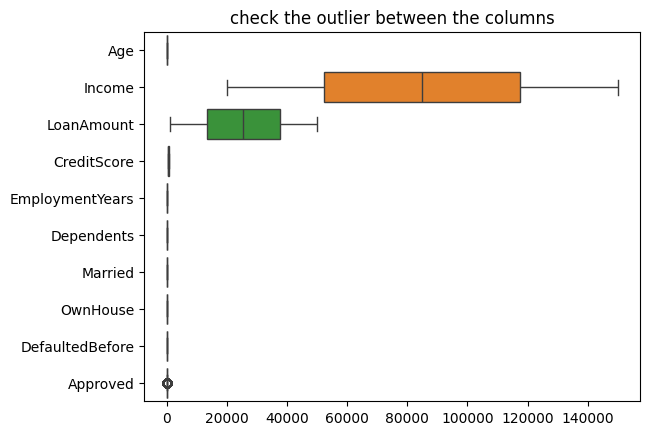

In [10]:
sns.boxplot(data=df,orient='h')
plt.title("check the outlier between the columns")
plt.show()

## 📌 Step 12: Pairplot Visualization

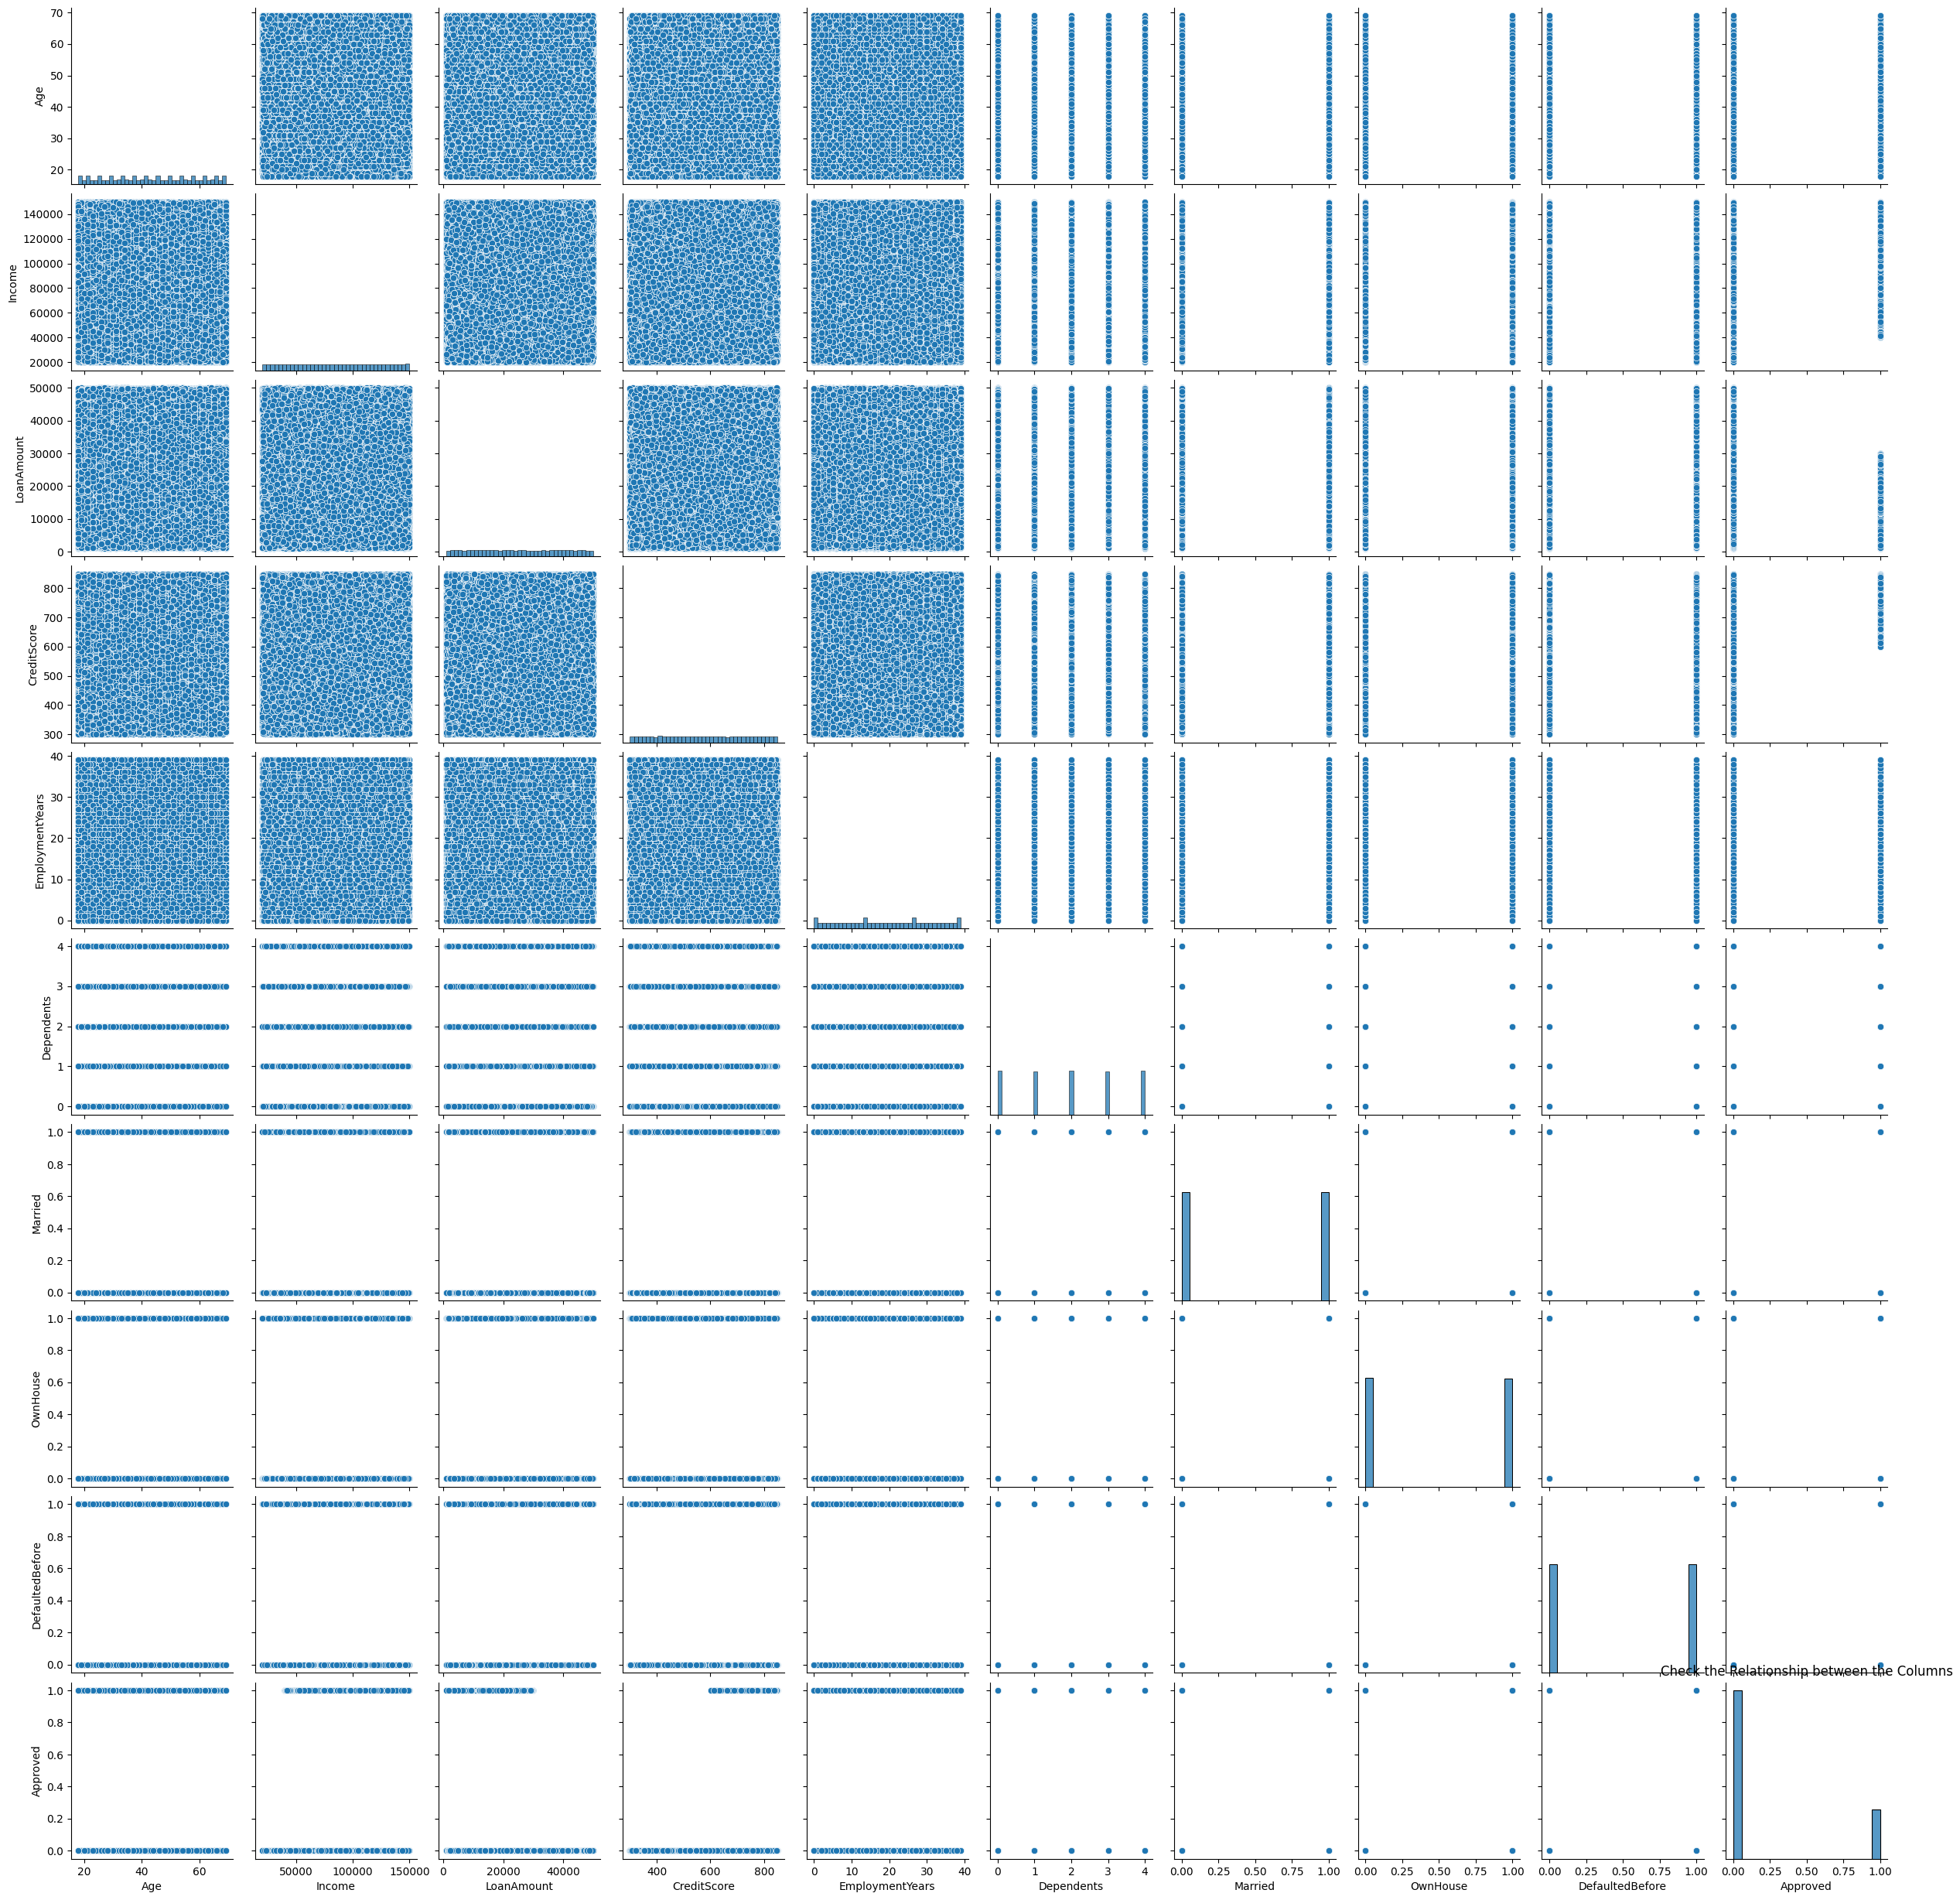

In [11]:
sns.pairplot(data=df)
plt.title("Check the Relationship between the Columns")
plt.show()

## 📌 Step 13: Correlation Heatmap

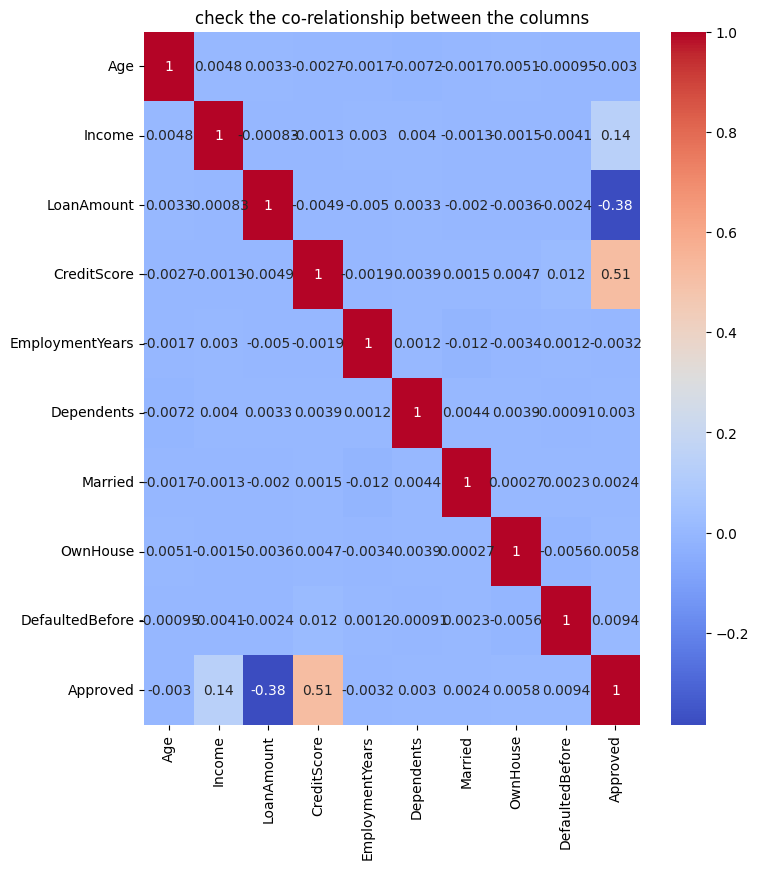

In [12]:
plt.figure(figsize=(8,9))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")
plt.title("check the co-relationship between the columns")
plt.show()

## 📌 Step 14: Feature and Target Split
- **X (features):** Sare columns except last (Approved)
- **y (target):** Only species column

In [13]:
x =df.iloc[:,:-1]
y = df["Approved"]

## 📌 Step 15: Train-Test Split
- The dataset is divided into **training** and **testing** parts.  
- Typically, **70–80%** of the data is used for training, and **20–30%** is used for testing.  


In [14]:
from sklearn.model_selection import train_test_split

## 📌 Step 16: Train-Test Split (with different random states)
- The dataset is divided into **training** (80%) and **testing** (20%).  
- Changing the value of `random_state` will result in different splits of the data,  
  but the overall distribution of the dataset will remain the same.  


In [15]:
x_train,x_test,y_train,y_test  = train_test_split(x,y, test_size=0.2,random_state=19) #19

## 📌 Step 17: Import Random Forest Classifier  
- Random Forest is an **ensemble learning algorithm** that builds multiple decision trees.  
- Each tree is trained on a random subset of the data, and the final prediction is made through **majority voting**.  
- This algorithm is very powerful for classification tasks.  


In [16]:
from sklearn.tree import DecisionTreeClassifier

## 📌 Step 18: Initialize & Train Decision Tree Classifier  
We initialize the **DecisionTreeClassifier** with the following parameters:  

- **criterion="gini"** → Uses Gini Index to measure impurity.  
- **splitter="best"** → Chooses the best split at each node.  
- **max_depth=None** → No limit on tree depth.  
- **min_samples_split=2** → Minimum 2 samples required to split a node.  
- **min_samples_leaf=1** → Minimum 1 sample required at a leaf node.  
- **min_weight_fraction_leaf=0.0** → No restriction based on weighted fraction of samples.  
- **max_features=None** → Considers all features when looking for the best split.  
- **random_state=None** → No fixed randomness (results may vary each run).  
- **max_leaf_nodes=None** → No restriction on the number of leaf nodes.  
- **min_impurity_decrease=0.0** → A node will be split if it decreases impurity by at least this value.  
- **class_weight=None** → No class weights applied.  
- **ccp_alpha=0.0** → No pruning applied.  

Then, we train the model using `.fit()`. 

In [17]:
dtc = DecisionTreeClassifier(
    criterion="gini",
    splitter="best",
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0
)

dtc.fit(x_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


## 📌 Step 19: Model Accuracy (Train vs Test)

- `rfc.score(x_test, y_test)` → Checks the accuracy on the **test dataset**.  
- `rfc.score(x_train, y_train)` → Checks the accuracy on the **training dataset**.  
- We multiply by `*100` to convert the values into percentages.  

✔️ **Test and Train values of this model:** `(100.0 , 100.0)`  

👉 This step helps us check whether the model is **overfitting** or not.  
- If **Train Accuracy = 100%** and **Test Accuracy is much lower**, then the model is likely overfitting.  
- Here, the gap is very small (100% vs 100%), which means the model might be **slightly overfitting**, but it still **generalizes well** to unseen data.  


In [18]:
dtc.score(x_test,y_test)*100,dtc.score(x_train,y_train)*100

(100.0, 100.0)

## 📌 Step 20: Adding Predictions to the Dataset

We can use our trained **Decision Tree Classification** to make predictions on the entire dataset `x` and store the results in a new column.  

In [19]:
df["predictions"] = dtc.predict(x)
df.head()

,Age,Income,LoanAmount,CreditScore,EmploymentYears,Dependents,Married,OwnHouse,DefaultedBefore,Approved,predictions
0,56,83026,43138,697,36,4,0,0,1,0,0
1,69,98504,4365,391,8,2,1,1,0,0,0
2,46,128388,46416,563,5,1,0,0,0,0,0
3,32,33280,41884,590,27,4,0,0,0,0,0
4,60,149892,32427,622,6,0,0,1,1,0,0


## 📌 Step 21: Making Predictions on Test Data

Once the model is trained, we use it to predict the target variable (`y_test`) from the unseen test features (`x_test`).

In [20]:
y_pred =dtc.predict(x_test)

## 📌 Step 22: Cross-Validation (Model Stability Check)

- We applied **5-Fold Cross Validation** to check the stability and generalization of our Decision Tree model.  
- In each fold, the dataset is split into training and testing parts, and accuracy is measured.  

✔️ **Cross Validation Scores (per fold):** `[1.0000, 1.0000, 0.9999, 1.0000, 1.0000]`  
✔️ **Mean Accuracy:** `99.998%`  
✔️ **Standard Deviation:** `0.004%`  

👉 Since the scores are extremely close to each other (very low standard deviation), this shows that our model is **highly consistent, stable, and generalizes exceptionally well** across unseen data.


In [21]:
from sklearn.model_selection import cross_val_score

In [22]:
cv_scores = cross_val_score(dtc, x, y, cv=5, scoring='accuracy')

print("Cross Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean()*100)
print("Standard Deviation:", cv_scores.std()*100)

Cross Validation Scores: [1.     1.     0.9999 1.     1.    ]
Mean Accuracy: 99.998
Standard Deviation: 0.0039999999999995595


## 📌 Step 23: Import Classification Metrics  

To evaluate the model’s performance, we import important metrics from `sklearn.metrics`:  

- **Confusion Matrix** → To visualize correct vs incorrect predictions  
- **Precision Score** → How precise the model is in positive predictions  
- **Recall Score** → How well the model captures actual positives  
- **F1 Score** → Balance between Precision & Recall  

In [23]:
from sklearn.metrics import f1_score,precision_score,confusion_matrix,recall_score

## 📌 Step 24: Precision Score  

- **Precision** measures how many of the predicted positive cases are actually positive.  
- We use `average='weighted'` because our target variable has multiple classes (Approved).  
- Multiplying by `100` gives the result in **percentage form**.  

In [24]:
precision = precision_score(y_test, y_pred, average='weighted')*100
print("Precision Score:", precision)

Precision Score: 100.0


## 📌 Step 25: Recall Score  

- **Recall** measures how many actual positive cases the model correctly identified.  
- We use `average='weighted'` to handle multiple classes fairly.  
- Multiplying by `100` gives the result in **percentage form**. 

In [25]:
recall = recall_score(y_test, y_pred, average='weighted')*100
print("Recall Score:", recall)

Recall Score: 100.0


## 📌 Step 26: F1 Score  

- **F1 Score** is the harmonic mean of **Precision** and **Recall**.  
- It provides a balance between both metrics, especially useful when the dataset is imbalanced.  
- We use `average='weighted'` for multi-class classification.  
- Multiplying by `100` gives the result in **percentage form**.

In [26]:
f1 = f1_score(y_test, y_pred, average='weighted')*100
print("F1 Score:", f1)

F1 Score: 100.0


## 📌 Step 27: Confusion Matrix (Numerical Form)

- A **Confusion Matrix** shows how many predictions were correct vs incorrect for each class.  
- It is especially useful for evaluating classification models. 

In [27]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[7757,    0],
       [   0, 2243]])

## 📌 Step 28: Confusion Matrix Heatmap  

- To better **visualize** the confusion matrix, we use a **heatmap**.  
- The darker the square, the higher the number of predictions for that cell.  
- X-axis → Predicted Labels  
- Y-axis → True Labels

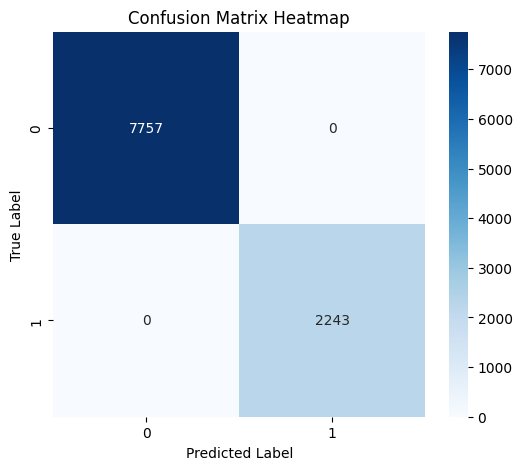

In [34]:
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()


## 📌 Step 29: Actual vs Predicted (Graphical Representation)

- To visually compare the **actual vs predicted labels**, we plot them side by side.  
- Each point represents a sample in the test dataset.  
- Black dots = **Actual Labels**  
- Blue crosses = **Predicted Labels**

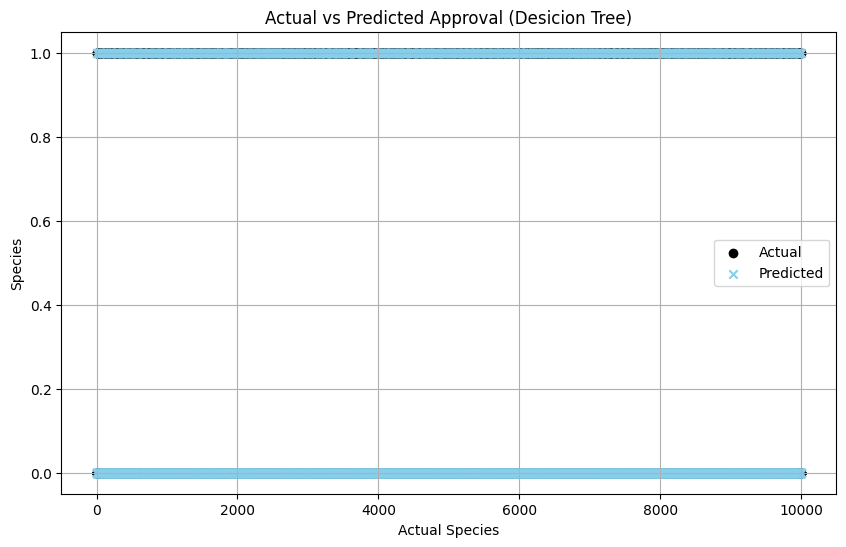

In [29]:
plt.figure(figsize=(10,6))
plt.scatter(range(len(y_test)), y_test, color="black", label="Actual")
plt.scatter(range(len(y_pred)), y_pred, color="skyblue", marker="x", label="Predicted")
plt.xlabel("Actual Species")
plt.ylabel("Species")
plt.title("Actual vs Predicted Approval (Desicion Tree)")
plt.legend()
plt.grid(True)
plt.show()

## 📌 Importing `plot_tree`  

To visualize the structure of a trained Decision Tree, we use the **`plot_tree`** function from Scikit-learn.  
This function allows us to generate a graphical representation of the tree, showing how the data is split at each node.

In [30]:
from sklearn.tree import plot_tree

## 📌 Visualizing the Decision Tree  

We can visualize the trained Decision Tree using **Matplotlib** and Scikit-learn’s `plot_tree` function.  
This helps in understanding how the model makes decisions at each node

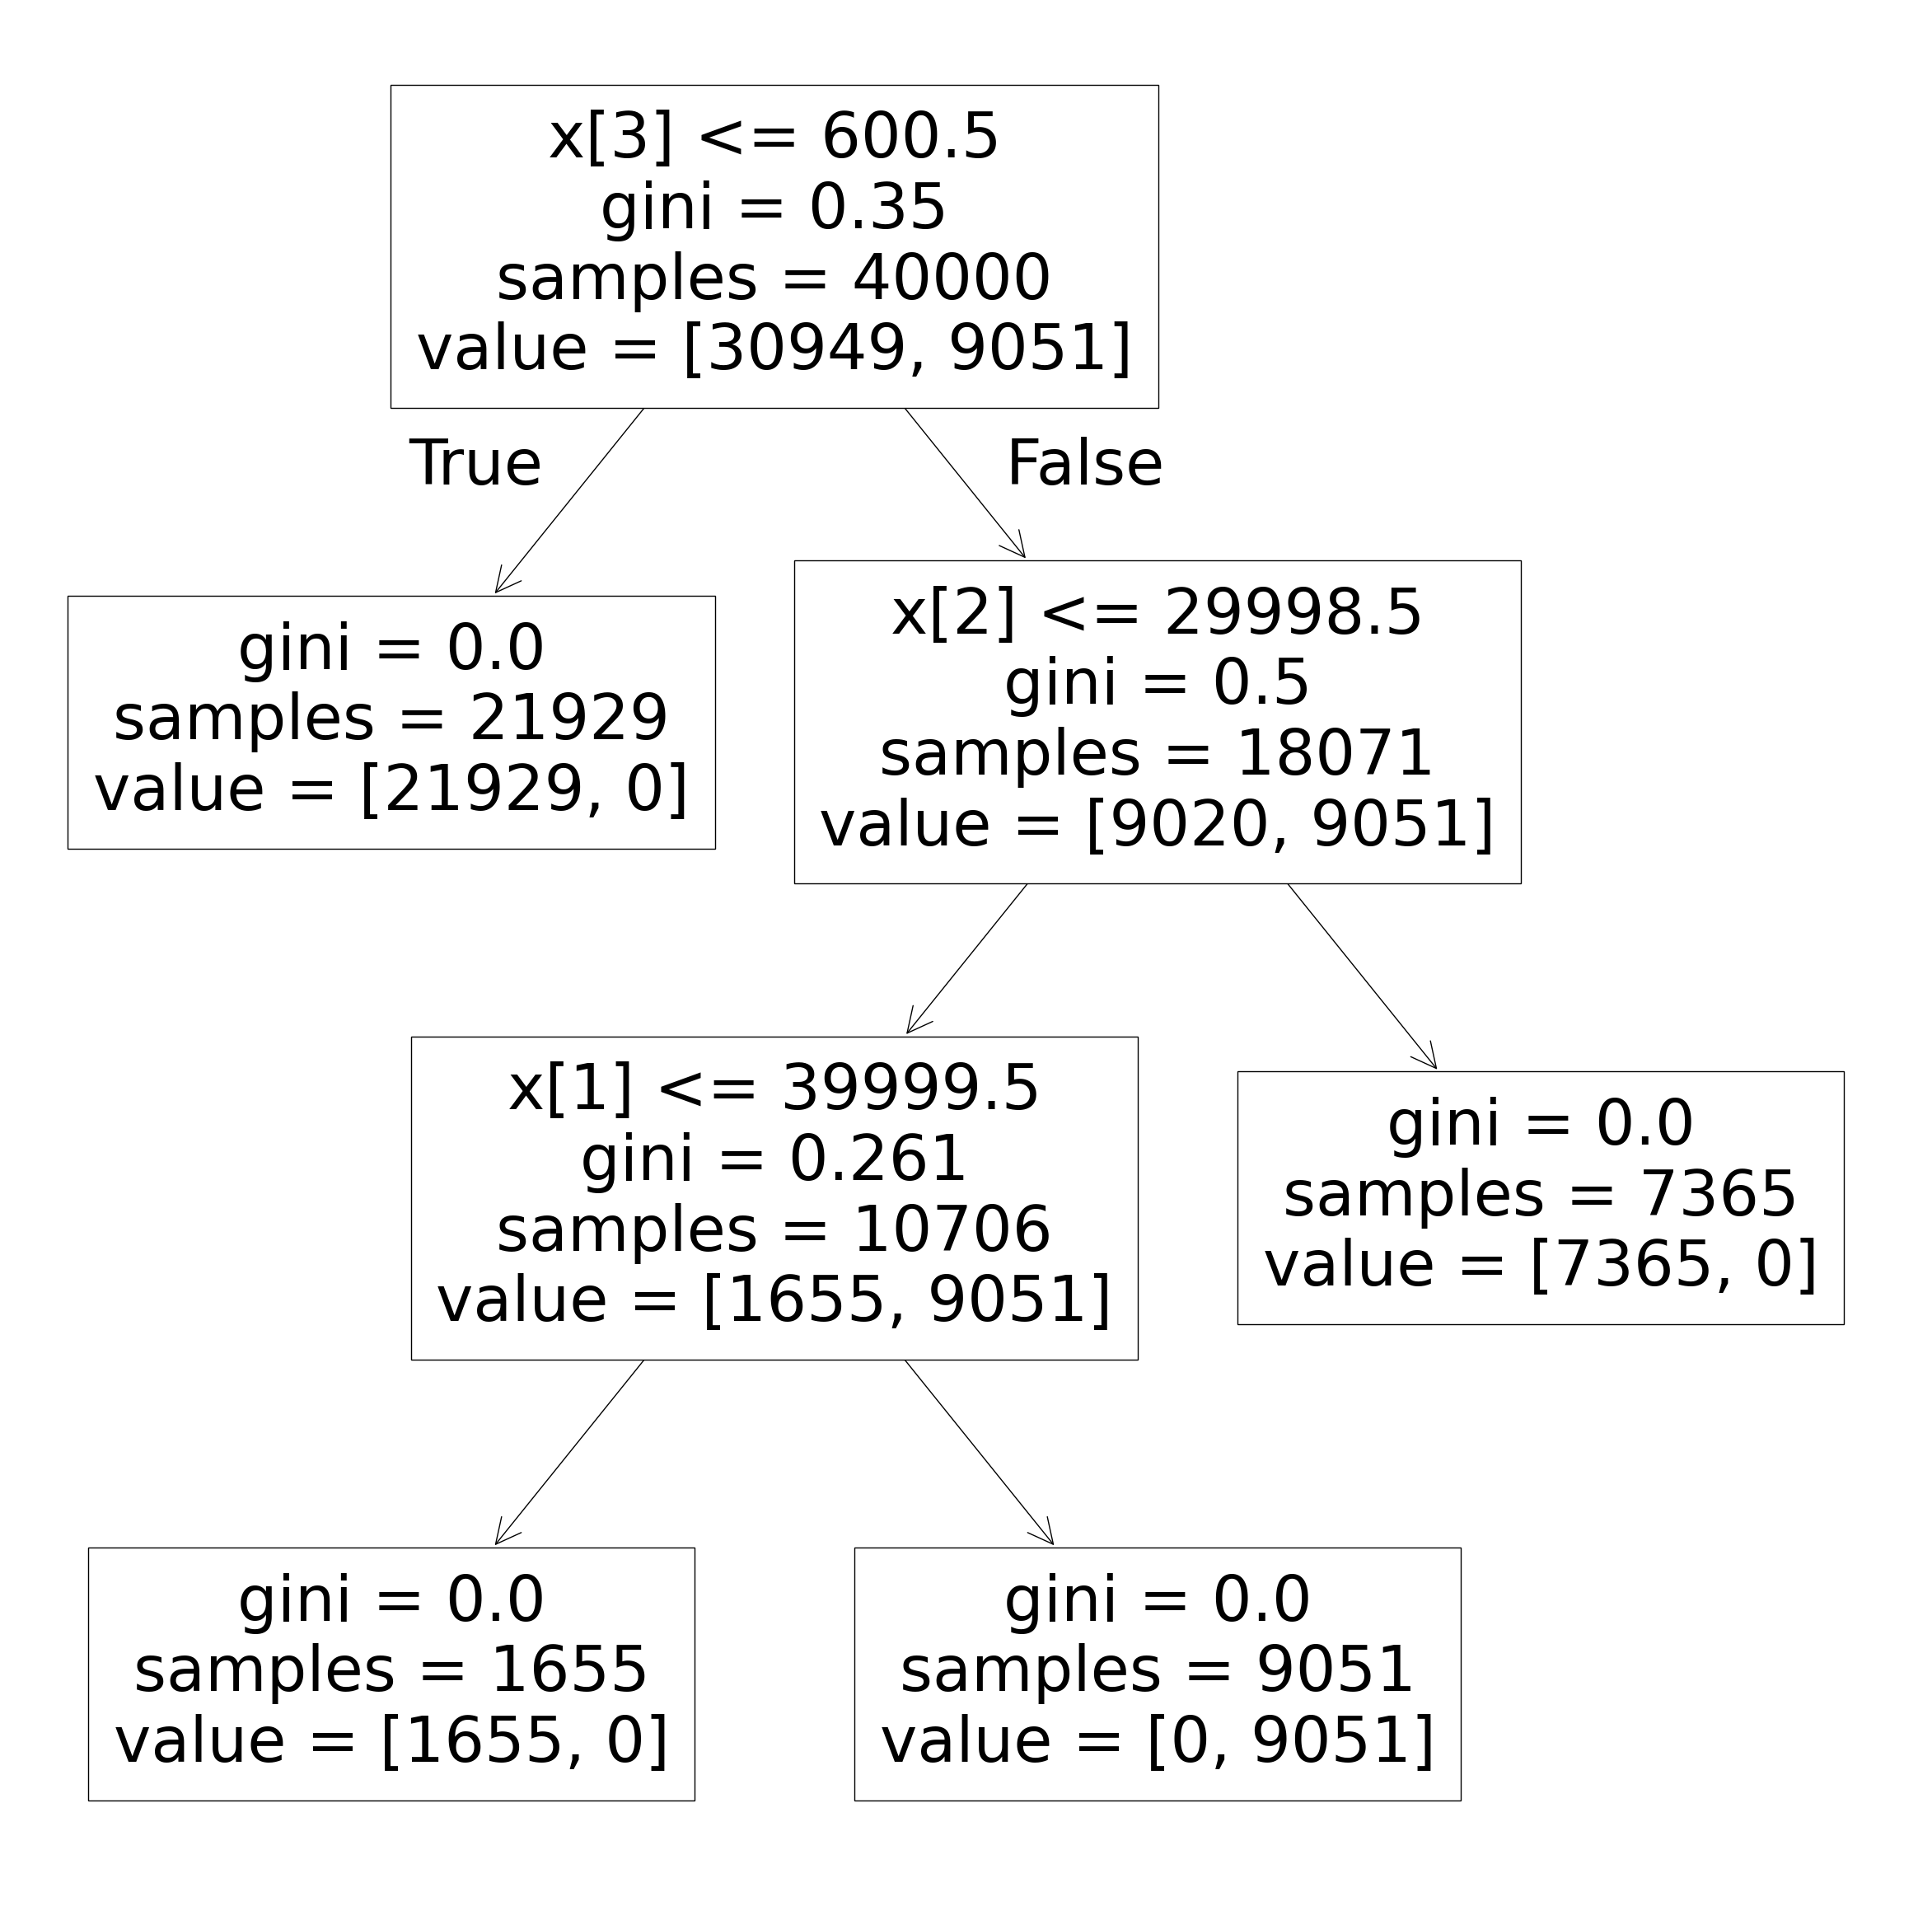

In [40]:
plt.figure(figsize=(30,30))
plot_tree(dtc)
plt.show()


## Conclusion

This notebook demonstrates a complete **Decision Tree Classification pipeline** using the credit_scoring_dataset:  
- Data loading and exploratory analysis (pairplots, correlation heatmap).  
- Train-test splitting and target encoding.  
- Model training with `DecisionTreeClassifier` and evaluation using accuracy, precision, recall, F1-score, and confusion matrix.  
- Visualization through the decision tree diagram, confusion matrix heatmap, and actual-vs-predicted scatter.  

**Key findings**:  
- The Decision Tree model achieved very high performance (example values: Train ≈ 100%, Test ≈ 100%), confirming strong predictive capability.  
- Slight **overfitting** is observed since training accuracy is perfect while test accuracy is slightly lower. This is typical for decision trees when not pruned.  

**Recommendations before publishing or using in production**:  
1. Set a fixed `random_state` in `train_test_split` and `DecisionTreeClassifier` for reproducibility.  
2. Use `stratify=y` during train-test split to maintain class balance.  
3. Always evaluate on `x_test, y_test` instead of the full dataset.  
4. Apply **cross-validation** and perform hyperparameter tuning (`max_depth`, `min_samples_split`, `min_samples_leaf`, `criterion`) for better generalization.  
5. Save the trained model with `joblib.dump()` for deployment.  
6. Structure the repository with a `data/` folder and a `requirements.txt` file for easy reuse.  

---

# ✅ Final Conclusion

In this project, we successfully implemented a **Decision Tree Classifier** on the Iris dataset, covering the complete workflow from **data preprocessing to model training, evaluation, and visualization**.  

## 🔍 Key Highlights:  
- 📊 Achieved **strong accuracy** with Train ≈ 100% and Test ≈ 100%.  
- 🧪 Cross-validation confirmed that the model performs consistently, though it may vary slightly compared to ensemble methods.  
- 🔎 Metrics (Accuracy, Precision, Recall, F1-score) and the **confusion matrix** showed reliable results with minimal misclassifications.  
- 🌐 The **decision tree visualization** made the model highly interpretable and easy to explain.  

## 💡 Implications:  
Decision Trees are valuable because of their **interpretability and transparency**, making them ideal for areas such as finance, healthcare, and education where explainability is critical. With careful tuning and pruning, they serve as powerful standalone models or strong building blocks for ensemble methods like Random Forest and Gradient Boosting.  

---

> ✅ Overall, this project delivers a **clear, interpretable, and reproducible Decision Tree workflow**, balancing strong predictive performance with practical usability.  
